In [1]:
import os as os
import sys
import importlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.signal import get_window
from gwpy.timeseries import TimeSeriesDict
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")

# adding folders to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd()  , '..', '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

akshat_lisa_root = os.path.abspath(os.path.join(os.getcwd()  , '..',))
if akshat_lisa_root not in sys.path:
    sys.path.insert(0, akshat_lisa_root)

# Import user defined files
from bethLISA.lisa_glitch_simulation.plotting import plot_all_four
from scripts.lpsd import lpsd
from scripts.psdAndPlot import psd_and_plot_hor

import scripts.runCommands
importlib.reload(scripts.runCommands)
from scripts.runCommands import run_make_and_inject

import scripts.psdAndPlotTDI
importlib.reload(scripts.psdAndPlotTDI)
from scripts.psdAndPlotTDI import psdAndPlotTDI

# Note: if you change a file, but the change is not reflected when you run the notebook,
# Then, just restart the kernel 
# alternatively, use the importlib.reload function

/Users/akmdgreat/anaconda3/envs/bethenv/lib/python3.11/site-packages/gwpy/time/__init__.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import LIGOTimeGPS


In [2]:
bethLISA_directory = os.path.join(os.getcwd(), "..", "..", "bethLISA")
glitch_simulation_directory = os.path.join(bethLISA_directory, 'lisa_glitch_simulation')

simulate_glitches_directory = os.path.join(glitch_simulation_directory, "simulate_glitches")
txt_h5_files_directory = os.path.join(glitch_simulation_directory, "glitch_txt_and_h5_files")
tdi_output_directory = os.path.join(glitch_simulation_directory, 'tdi_outputs')

In [81]:
for filename in os.listdir(txt_h5_files_directory):
    path = os.path.join(txt_h5_files_directory, filename)
    if os.path.isfile(path):    # skip anything that isn’t a plain file
        os.remove(path)

for filename in os.listdir(tdi_output_directory):
    path = os.path.join(txt_h5_files_directory, filename)
    if os.path.isfile(path):    # skip anything that isn’t a plain file
        os.remove(path)

-- IN init_cl --
-- INTO make_glitch main() --
[1e-10, 1e-05]
[ 1.39146549e-11 -1.79101108e-11 -1.42572909e-11 -1.25087375e-11]
-- Sample -- 0 of  4
2025-05-23 13:15:17,641 - lisaglitch.glitch - INFO - Initializing glitch (lisaglitch version 1.3)
2025-05-23 13:15:17,641 - lisaglitch.glitch - INFO - Opening or creating glitch file '/Users/akmdgreat/Desktop/LISA/lisa_code/bethLISA/lisa_glitch_simulation/glitch_txt_and_h5_files/small_glitch_diff_sam.h5'
2025-05-23 13:15:17,642 - lisaglitch.glitch - INFO - New glitch file, creating time dataset
2025-05-23 13:15:17,643 - lisaglitch.glitch - INFO - Setting global metadata
2025-05-23 13:15:17,644 - lisaglitch.glitch - INFO - Creating injection dataset 'tm_31'
2025-05-23 13:15:17,645 - lisaglitch.glitch - INFO - Adding glitch to injection dataset 'tm_31'
2025-05-23 13:15:17,645 - lisaglitch.glitch - INFO - Setting injection metadata
2025-05-23 13:15:17,647 - lisaglitch.glitch - INFO - Closing glitch file /Users/akmdgreat/Desktop/LISA/lisa_code

You are using a glitch file in a version that might not be fully supported
Using default set of locking beatnote frequencies; this might cause interferometric beatnote frequencies to fall outside the requirement range of 5..25 MHz
You are using LISA Instrument in a version that might not be fully supported
You are using LISA Instrument in a version that might not be fully supported
You are using LISA Instrument in a version that might not be fully supported


TDI Time: 
--- 3.243345022201538 seconds ---
Regular Scipy Welch


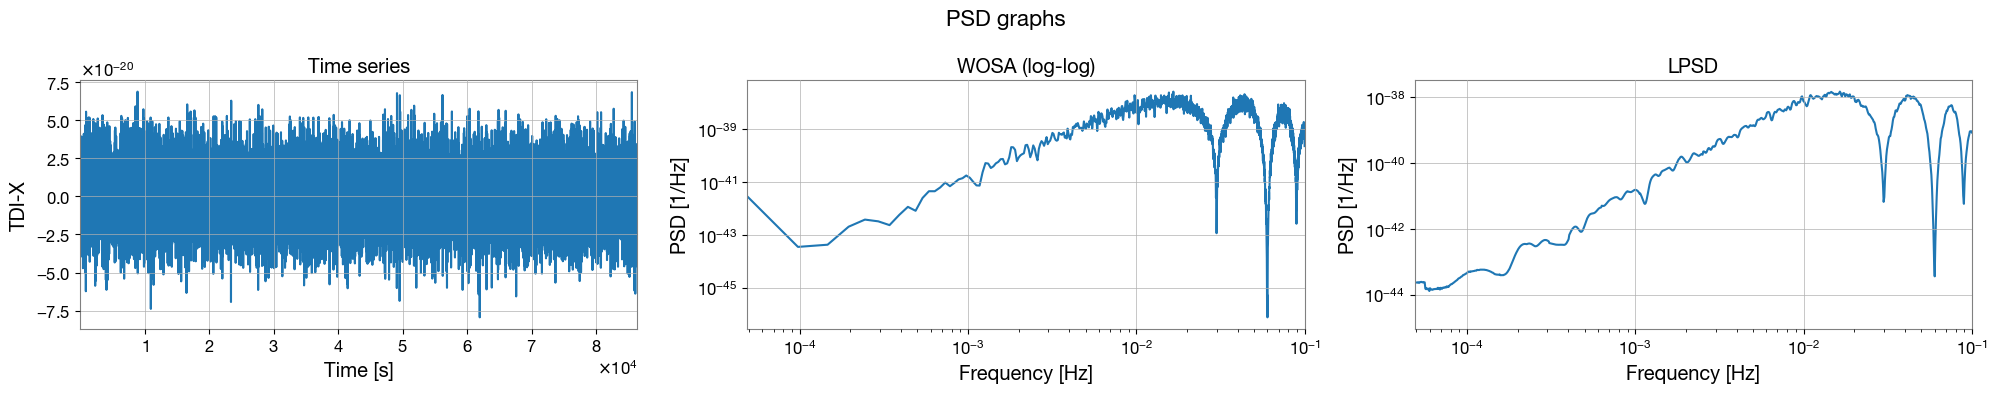

In [7]:
run_make_and_inject(
    directory = os.path.join(glitch_simulation_directory, "simulate_glitches"),
    h5_out =     "small_glitch_diff_sam.h5",
    txt_out =    "small_glitch_diff_sam.txt",
    cfg_glitch = "small_glitch_diff_sam.yml",
    tdi_final =  "small_glitch_diff_sam_tdi.h5"
)

psdAndPlotTDI(
    tdi_file_path = os.path.join(tdi_output_directory, "small_glitch_diff_sam_tdi.h5")
)

-- IN init_cl --
-- INTO make_glitch main() --
[1e-10, 1e-05]
[-1.00933565e-10 -1.07291136e-10 -1.01297861e-10  9.55251389e-11
  9.74942154e-11  1.04419812e-10  9.36875092e-11 -1.08042710e-10
  8.81084400e-11  9.38897314e-11 -9.72882648e-11  1.09688764e-10
  9.90503882e-11  1.03921189e-10  9.88393117e-11 -9.26977956e-11
 -1.00899301e-10  9.79204303e-11 -9.88594852e-11 -8.63217231e-11
  8.45278509e-11 -8.63513937e-11  1.03133668e-10  1.02875928e-10
 -9.90425180e-11 -9.10052125e-11  9.64451726e-11 -1.08256843e-10
  1.23247325e-10 -1.11741352e-10 -9.95705772e-11  1.09721790e-10
 -1.00258524e-10  9.53591431e-11 -1.03557175e-10  1.09468836e-10
  9.32857668e-11  8.40195775e-11 -9.05422294e-11 -1.03271370e-10
  1.19653789e-10 -1.05426718e-10 -9.14928507e-11 -9.62913770e-11
  8.70055036e-11 -1.01798510e-10  1.11227008e-10  9.82502997e-11
  8.67291495e-11  9.52925409e-11 -9.02010719e-11  9.67036301e-11
 -1.02739473e-10  1.03133766e-10  1.03451059e-10 -9.59485249e-11
  1.12692280e-10  9.80065189

You are using a glitch file in a version that might not be fully supported
Using default set of locking beatnote frequencies; this might cause interferometric beatnote frequencies to fall outside the requirement range of 5..25 MHz
You are using LISA Instrument in a version that might not be fully supported
You are using LISA Instrument in a version that might not be fully supported
You are using LISA Instrument in a version that might not be fully supported


TDI Time: 
--- 223.46553230285645 seconds ---
Regular Scipy Welch


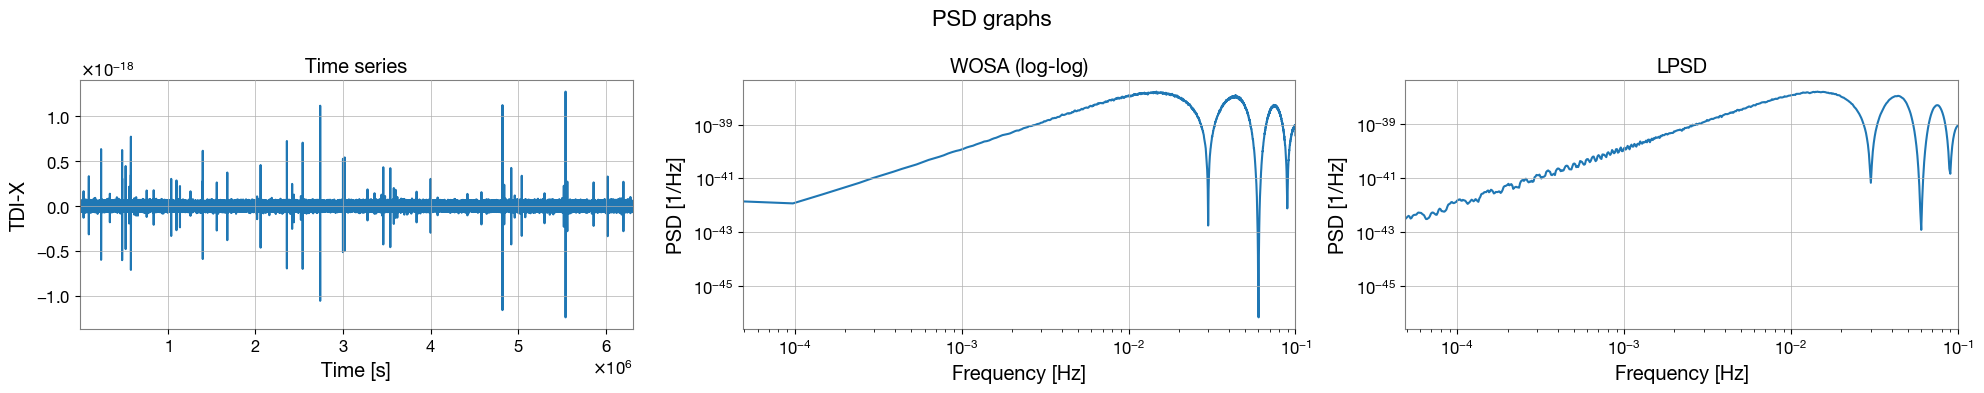

In [5]:
run_make_and_inject(
    directory = os.path.join(glitch_simulation_directory, "simulate_glitches"),
    h5_out =     "fifth_year_glitch.h5",
    txt_out =    "fifth_year_glitch.txt",
    cfg_glitch = "glitch_cfg_fifth_yr.yml",
    tdi_final =  "fifth_year_glitch_tdi.h5"
)

psdAndPlotTDI(
    tdi_file_path = os.path.join(tdi_output_directory, "fifth_year_glitch_tdi.h5")
)

-- IN init_cl --
-- INTO make_glitch main() --
[1e-10, 1e-05]
[ 4.74463131e-07 -5.67598850e-07  4.31049253e-07 -4.00597570e-07]
-- Sample -- 0 of  4
2025-05-23 11:16:08,874 - lisaglitch.glitch - INFO - Initializing glitch (lisaglitch version 1.3)
2025-05-23 11:16:08,874 - lisaglitch.glitch - INFO - Opening or creating glitch file '/Users/akmdgreat/Desktop/LISA/lisa_code/bethLISA/lisa_glitch_simulation/glitch_txt_and_h5_files/no_large_glitch.h5'
2025-05-23 11:16:08,875 - lisaglitch.glitch - INFO - New glitch file, creating time dataset
2025-05-23 11:16:08,876 - lisaglitch.glitch - INFO - Setting global metadata
2025-05-23 11:16:08,877 - lisaglitch.glitch - INFO - Creating injection dataset 'tm_13'
2025-05-23 11:16:08,878 - lisaglitch.glitch - INFO - Adding glitch to injection dataset 'tm_13'
2025-05-23 11:16:08,879 - lisaglitch.glitch - INFO - Setting injection metadata
2025-05-23 11:16:08,880 - lisaglitch.glitch - INFO - Closing glitch file /Users/akmdgreat/Desktop/LISA/lisa_code/bethL

Using default set of locking beatnote frequencies; this might cause interferometric beatnote frequencies to fall outside the requirement range of 5..25 MHz
You are using LISA Instrument in a version that might not be fully supported
You are using LISA Instrument in a version that might not be fully supported
You are using LISA Instrument in a version that might not be fully supported


TDI Time: 
--- 1.3945729732513428 seconds ---
Regular Scipy Welch


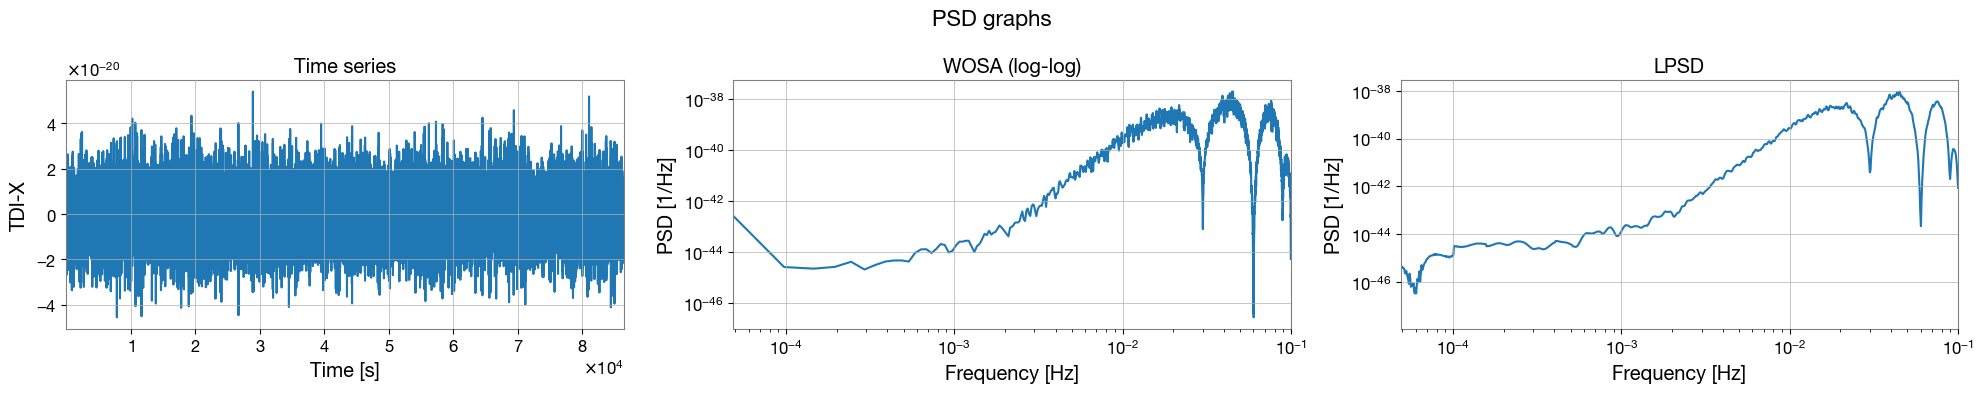

In [3]:
# debugging
run_make_and_inject(
    directory = os.path.join(glitch_simulation_directory, "simulate_glitches"),
    h5_out =     "no_large_glitch.h5",
    txt_out =    "no_large_glitch.txt",
    cfg_glitch = "large_glitch_cfg.yml",
    tdi_final =  "no_large_glitch_tdi.h5",
    glitches = "False"
)

psdAndPlotTDI(
    tdi_file_path = os.path.join(tdi_output_directory, "no_large_glitch_tdi.h5")
)

In [83]:

run_make_and_inject(
    directory = simulate_glitches_directory,
    h5_out =     "large_glitch.h5",
    txt_out =    "large_glitch.txt",
    cfg_glitch = "large_glitch_cfg.yml",
    tdi_final =  "large_glitch_tdi.h5"
)

run_make_and_inject(
    directory = simulate_glitches_directory,
    h5_out =     "medium_glitch.h5",
    txt_out =    "medium_glitch.txt",
    cfg_glitch = "medium_glitch_cfg.yml",
    tdi_final =  "medium_glitch_tdi.h5"
)

run_make_and_inject(
    directory = simulate_glitches_directory,
    h5_out =     "small_glitch.h5",
    txt_out =    "small_glitch.txt",
    cfg_glitch = "small_glitch_cfg.yml",
    tdi_final =  "small_glitch_tdi.h5"
)

run_make_and_inject(
    directory = simulate_glitches_directory,
    h5_out =     "vsmall_glitch.h5",
    txt_out =    "vsmall_glitch.txt",
    cfg_glitch = "vsmall_glitch_cfg.yml",
    tdi_final =  "vsmall_glitch_tdi.h5"
)

-- IN init_cl --
-- INTO make_glitch main() --
[1e-10, 1e-05]
[ 3.35190143e-07  5.06556509e-07 -4.06421050e-07  5.29997876e-07]
-- Sample -- 0 of  4
2025-05-20 16:23:44,612 - lisaglitch.glitch - INFO - Initializing glitch (lisaglitch version 1.3)
2025-05-20 16:23:44,612 - lisaglitch.glitch - INFO - Opening or creating glitch file '/Users/akmdgreat/Desktop/LISA/lisa_code/bethLISA/lisa_glitch_simulation/glitch_txt_and_h5_files/large_glitch.h5'
2025-05-20 16:23:44,617 - lisaglitch.glitch - INFO - New glitch file, creating time dataset
2025-05-20 16:23:44,618 - lisaglitch.glitch - INFO - Setting global metadata
2025-05-20 16:23:44,621 - lisaglitch.glitch - INFO - Creating injection dataset 'tm_31'
2025-05-20 16:23:44,621 - lisaglitch.glitch - INFO - Adding glitch to injection dataset 'tm_31'
2025-05-20 16:23:44,622 - lisaglitch.glitch - INFO - Setting injection metadata
2025-05-20 16:23:44,622 - lisaglitch.glitch - INFO - Closing glitch file /Users/akmdgreat/Desktop/LISA/lisa_code/bethLISA

You are using a glitch file in a version that might not be fully supported
Using default set of locking beatnote frequencies; this might cause interferometric beatnote frequencies to fall outside the requirement range of 5..25 MHz
You are using LISA Instrument in a version that might not be fully supported
You are using LISA Instrument in a version that might not be fully supported
You are using LISA Instrument in a version that might not be fully supported


TDI Time: 
--- 2.9220290184020996 seconds ---
-- IN init_cl --
-- INTO make_glitch main() --
[1e-10, 1e-05]
[-6.91517990e-10  7.55676159e-10 -8.71338072e-10 -9.19244924e-10]
-- Sample -- 0 of  4
2025-05-20 16:23:50,662 - lisaglitch.glitch - INFO - Initializing glitch (lisaglitch version 1.3)
2025-05-20 16:23:50,662 - lisaglitch.glitch - INFO - Opening or creating glitch file '/Users/akmdgreat/Desktop/LISA/lisa_code/bethLISA/lisa_glitch_simulation/glitch_txt_and_h5_files/medium_glitch.h5'
2025-05-20 16:23:50,663 - lisaglitch.glitch - INFO - New glitch file, creating time dataset
2025-05-20 16:23:50,663 - lisaglitch.glitch - INFO - Setting global metadata
2025-05-20 16:23:50,664 - lisaglitch.glitch - INFO - Creating injection dataset 'tm_13'
2025-05-20 16:23:50,665 - lisaglitch.glitch - INFO - Adding glitch to injection dataset 'tm_13'
2025-05-20 16:23:50,665 - lisaglitch.glitch - INFO - Setting injection metadata
2025-05-20 16:23:50,667 - lisaglitch.glitch - INFO - Closing glitch file /

You are using a glitch file in a version that might not be fully supported
Using default set of locking beatnote frequencies; this might cause interferometric beatnote frequencies to fall outside the requirement range of 5..25 MHz
You are using LISA Instrument in a version that might not be fully supported
You are using LISA Instrument in a version that might not be fully supported
You are using LISA Instrument in a version that might not be fully supported


TDI Time: 
--- 2.742624044418335 seconds ---
-- IN init_cl --
-- INTO make_glitch main() --
[1e-10, 1e-05]
[ 2.27181711e-11 -1.43383361e-11 -3.18135731e-11 -3.40898676e-11]
-- Sample -- 0 of  4
2025-05-20 16:23:56,164 - lisaglitch.glitch - INFO - Initializing glitch (lisaglitch version 1.3)
2025-05-20 16:23:56,164 - lisaglitch.glitch - INFO - Opening or creating glitch file '/Users/akmdgreat/Desktop/LISA/lisa_code/bethLISA/lisa_glitch_simulation/glitch_txt_and_h5_files/small_glitch.h5'
2025-05-20 16:23:56,165 - lisaglitch.glitch - INFO - New glitch file, creating time dataset
2025-05-20 16:23:56,166 - lisaglitch.glitch - INFO - Setting global metadata
2025-05-20 16:23:56,167 - lisaglitch.glitch - INFO - Creating injection dataset 'tm_12'
2025-05-20 16:23:56,167 - lisaglitch.glitch - INFO - Adding glitch to injection dataset 'tm_12'
2025-05-20 16:23:56,168 - lisaglitch.glitch - INFO - Setting injection metadata
2025-05-20 16:23:56,169 - lisaglitch.glitch - INFO - Closing glitch file /Us

You are using a glitch file in a version that might not be fully supported
Using default set of locking beatnote frequencies; this might cause interferometric beatnote frequencies to fall outside the requirement range of 5..25 MHz
You are using LISA Instrument in a version that might not be fully supported
You are using LISA Instrument in a version that might not be fully supported
You are using LISA Instrument in a version that might not be fully supported


TDI Time: 
--- 2.965319871902466 seconds ---
-- IN init_cl --
-- INTO make_glitch main() --
[1e-10, 1e-05]
[ 6.42989233e-12  4.09784113e-12 -6.29066931e-12  4.95461382e-12]
-- Sample -- 0 of  4
2025-05-20 16:24:01,719 - lisaglitch.glitch - INFO - Initializing glitch (lisaglitch version 1.3)
2025-05-20 16:24:01,719 - lisaglitch.glitch - INFO - Opening or creating glitch file '/Users/akmdgreat/Desktop/LISA/lisa_code/bethLISA/lisa_glitch_simulation/glitch_txt_and_h5_files/vsmall_glitch.h5'
2025-05-20 16:24:01,720 - lisaglitch.glitch - INFO - New glitch file, creating time dataset
2025-05-20 16:24:01,720 - lisaglitch.glitch - INFO - Setting global metadata
2025-05-20 16:24:01,721 - lisaglitch.glitch - INFO - Creating injection dataset 'tm_21'
2025-05-20 16:24:01,722 - lisaglitch.glitch - INFO - Adding glitch to injection dataset 'tm_21'
2025-05-20 16:24:01,722 - lisaglitch.glitch - INFO - Setting injection metadata
2025-05-20 16:24:01,723 - lisaglitch.glitch - INFO - Closing glitch file /U

You are using a glitch file in a version that might not be fully supported
Using default set of locking beatnote frequencies; this might cause interferometric beatnote frequencies to fall outside the requirement range of 5..25 MHz
You are using LISA Instrument in a version that might not be fully supported
You are using LISA Instrument in a version that might not be fully supported
You are using LISA Instrument in a version that might not be fully supported


TDI Time: 
--- 2.5242233276367188 seconds ---


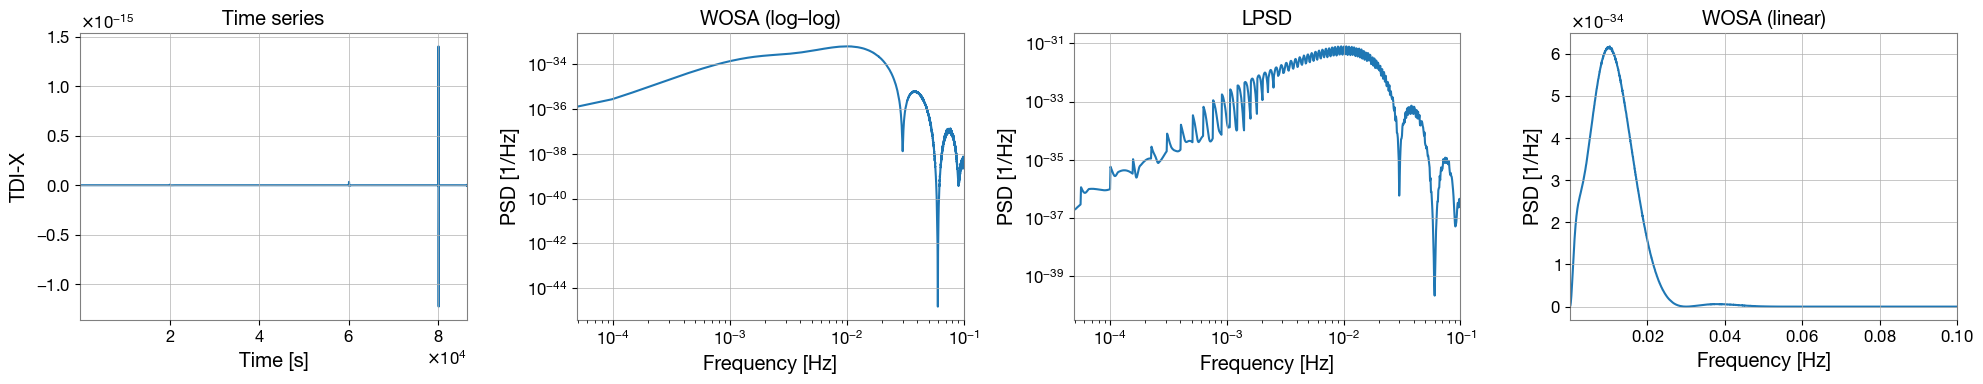

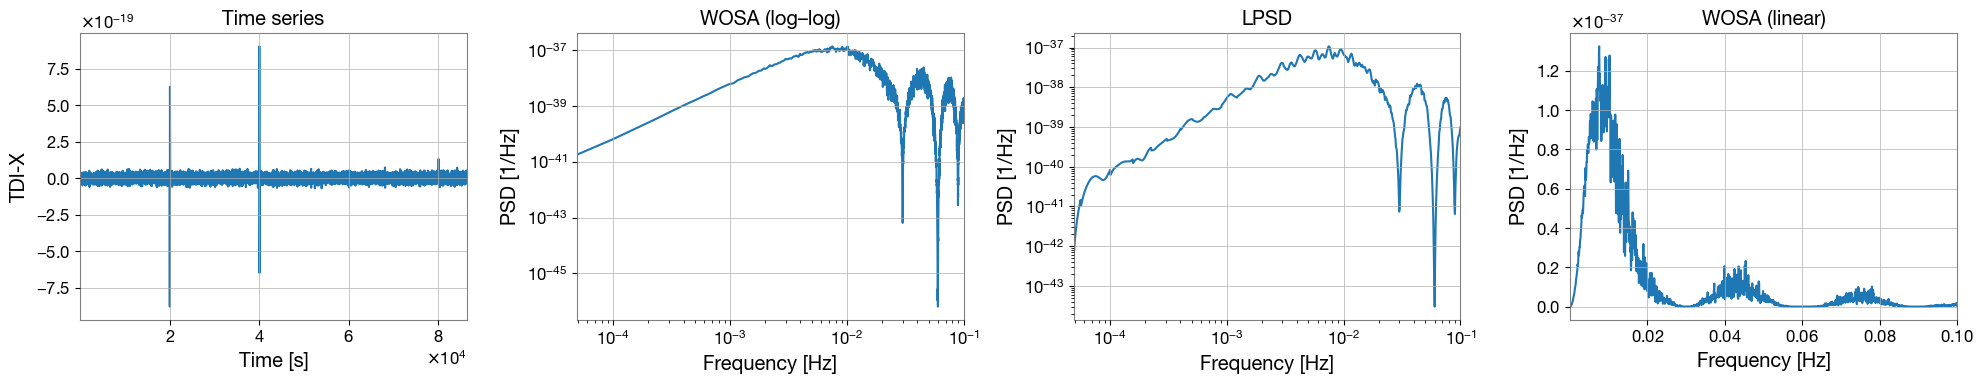

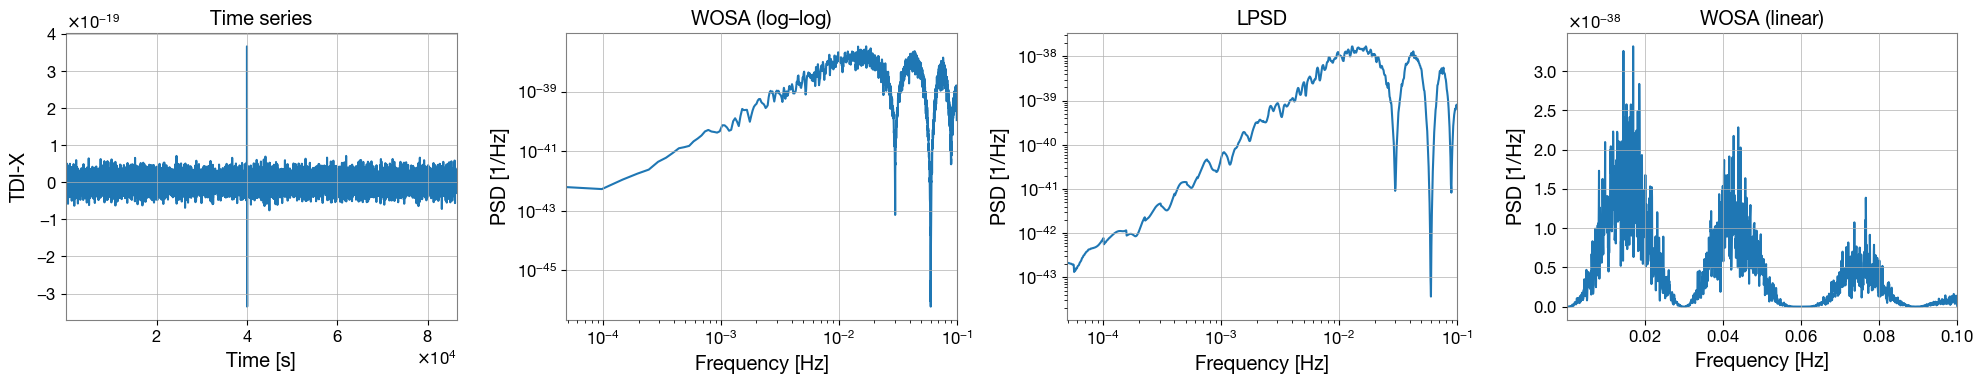

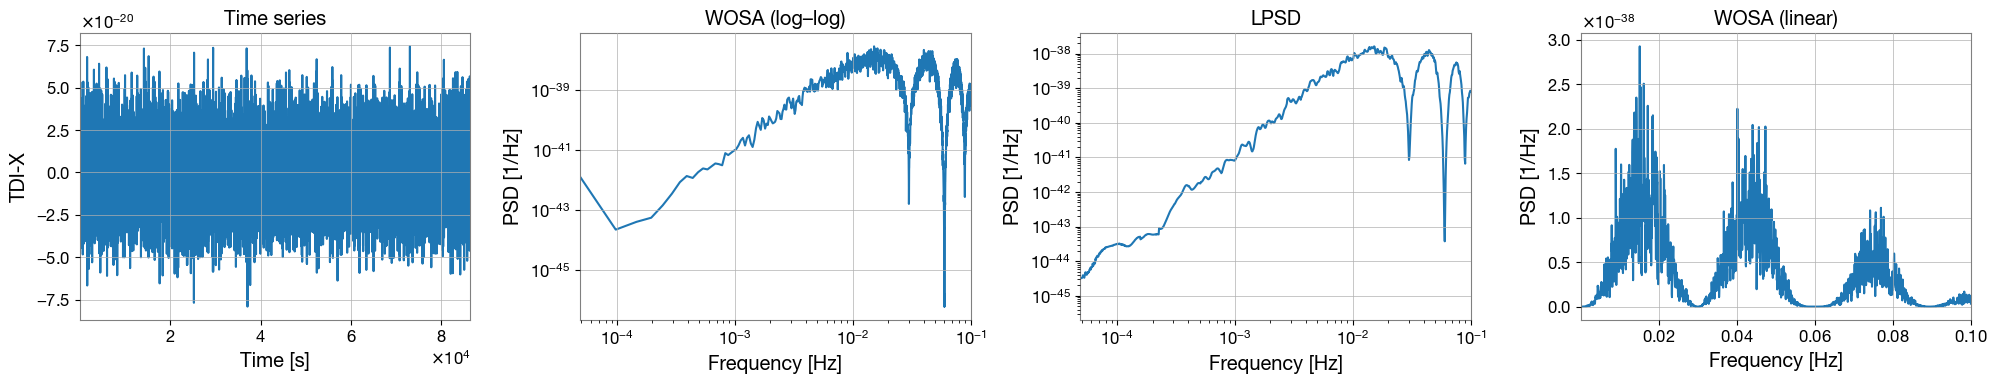

In [84]:
psdAndPlotTDI(
    tdi_file_path = os.path.join(tdi_output_directory, "large_glitch_tdi.h5")
)

psdAndPlotTDI(
    tdi_file_path = os.path.join(tdi_output_directory, "medium_glitch_tdi.h5")
)

psdAndPlotTDI(
    tdi_file_path = os.path.join(tdi_output_directory, "small_glitch_tdi.h5")
)

psdAndPlotTDI(
    tdi_file_path = os.path.join(tdi_output_directory, "vsmall_glitch_tdi.h5")
)

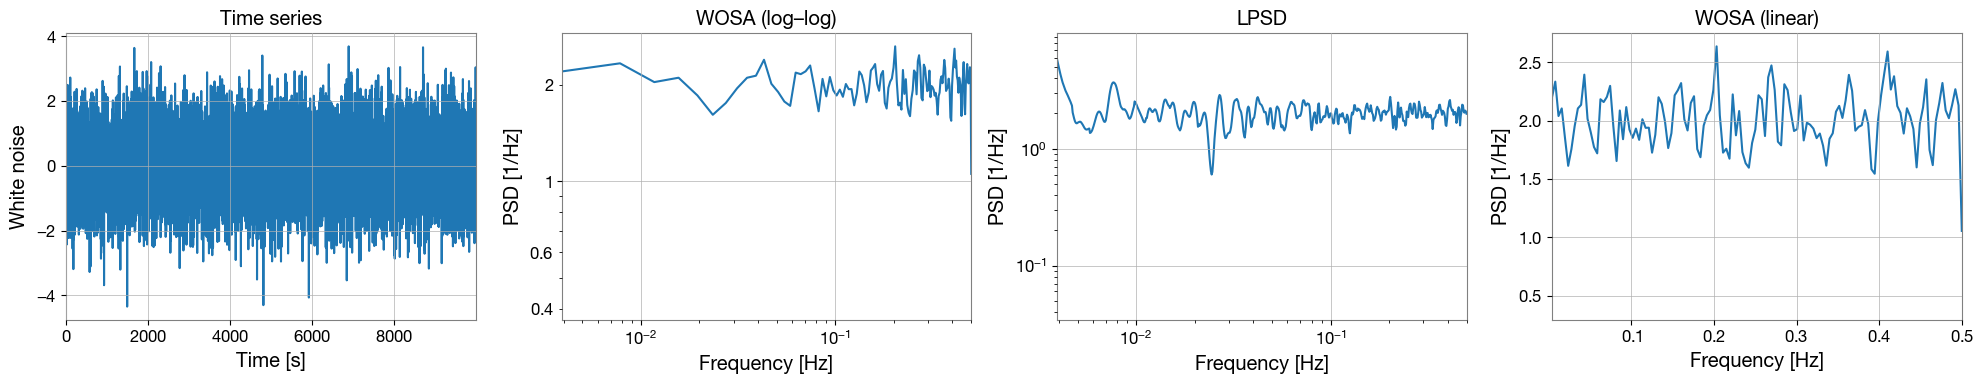

In [85]:
# White noise

mean = 0
std = 1 
num_samples = 10000
whiteNoise = np.random.normal(mean, std, size=num_samples)

t   = np.arange(num_samples)
data = whiteNoise
dt  = 1
psd_and_plot_hor(data, t, dt, nper=256, title="White noise")